In [1]:
import ray
from ray import tune
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.agents.ppo import APPOTrainer
import argparse
from ray.tune.registry import register_env
from pycigar.utils.registry import make_create_env
import yaml
import time
from pycigar.utils.input_parser import input_parser

SAVE_RATE = 2

"""
Load the scenarios configuration file. This file contains the scenario information
for the experiment.
"""
sim_params = input_parser('ieee37busdata_regulator_attack')

"""
Register the environment to OpenGymAI. This is necessary, RLlib can find the new environment
with string name env_name_v:version:, ex. SingleRelativeDiscreteCoopEnv_v0.
env_name: name of environment being used.
sim_params: simulation params, it is the scenario configuration.
simulator: the simulator being used, ex. opendss, gridlabd...
tracking_ids: list of ids of devices being tracked during the experiment.
"""

pycigar_params = {"exp_tag": "cooperative_multiagent_ppo",
                  "env_name": "CentralControlPVInverterEnv",
                  "sim_params": sim_params,
                  "simulator": "opendss",
                  "tracking_ids": ['adversary_inverter_s701a', 'reg1']}
"""
call function make_create_env() to register the new environment to OpenGymAI.
create_env() is a function to create new instance of the environment.
env_name: the registered name of the new environment.
"""
create_env, env_name = make_create_env(pycigar_params, version=0)
register_env(env_name, create_env)

test_env = create_env(sim_params)
obs_space = test_env.observation_space  # get the observation space, we need this to construct our agent(s) observation input
act_space = test_env.action_space  # get the action space, we need this to construct our agent(s) action output


In [2]:
obs = test_env.reset()
reward = 0
done = False
while not done:
    # for each observation, let the policy decides what to do
    obs, r, done, _ = test_env.step(2)
    reward += r
# plot the result. This will be saved in ./results
#test_env.plot(pycigar_params['exp_tag'], env_name, 0, reward)

[0. 0.]
[0. 0.]
[-106.16545455 -106.16545455]
[-106.14863478 -106.14863478]
[-106.20616076 -106.20616076]
[-106.09846941 -106.09846941]
[-82.2500995 -82.2500995]
[-61.63160088 -61.63160088]
[-57.17324334 -57.17324334]
[-48.68127092 -48.68127092]
[-42.81593536 -42.81593536]
[-40.5326913 -40.5326913]
[-26.05951986 -26.05951986]
[-19.74741884 -19.74741884]
[-20.09421146 -20.09421146]
[-17.48418673 -17.48418673]
[-15.8523387 -15.8523387]
[-15.91619217 -15.91619217]
[-17.18376537 -17.18376537]
[-18.90606975 -18.90606975]
[-20.52229554 -20.52229554]
[-21.56172722 -21.56172722]
[-21.81803684 -21.81803684]
[-21.38935681 -21.38935681]
[-20.28721769 -20.28721769]
[-19.17615839 -19.17615839]
[-18.50942624 -18.50942624]
[-18.12688007 -18.12688007]
[-17.73326439 -17.73326439]
[-17.34956766 -17.34956766]
[-16.89610609 -16.89610609]
[-16.55878508 -16.55878508]
[-16.39167711 -16.39167711]
[-16.31357719 -16.31357719]
[-16.20895825 -16.20895825]
[-15.9640652 -15.9640652]
[-15.49428294 -15.49428294]
[-15

In [3]:
import os
os.getcwd()

'/mnt/hdd/dev/LBL/ceds-cigar/rl/scripts'

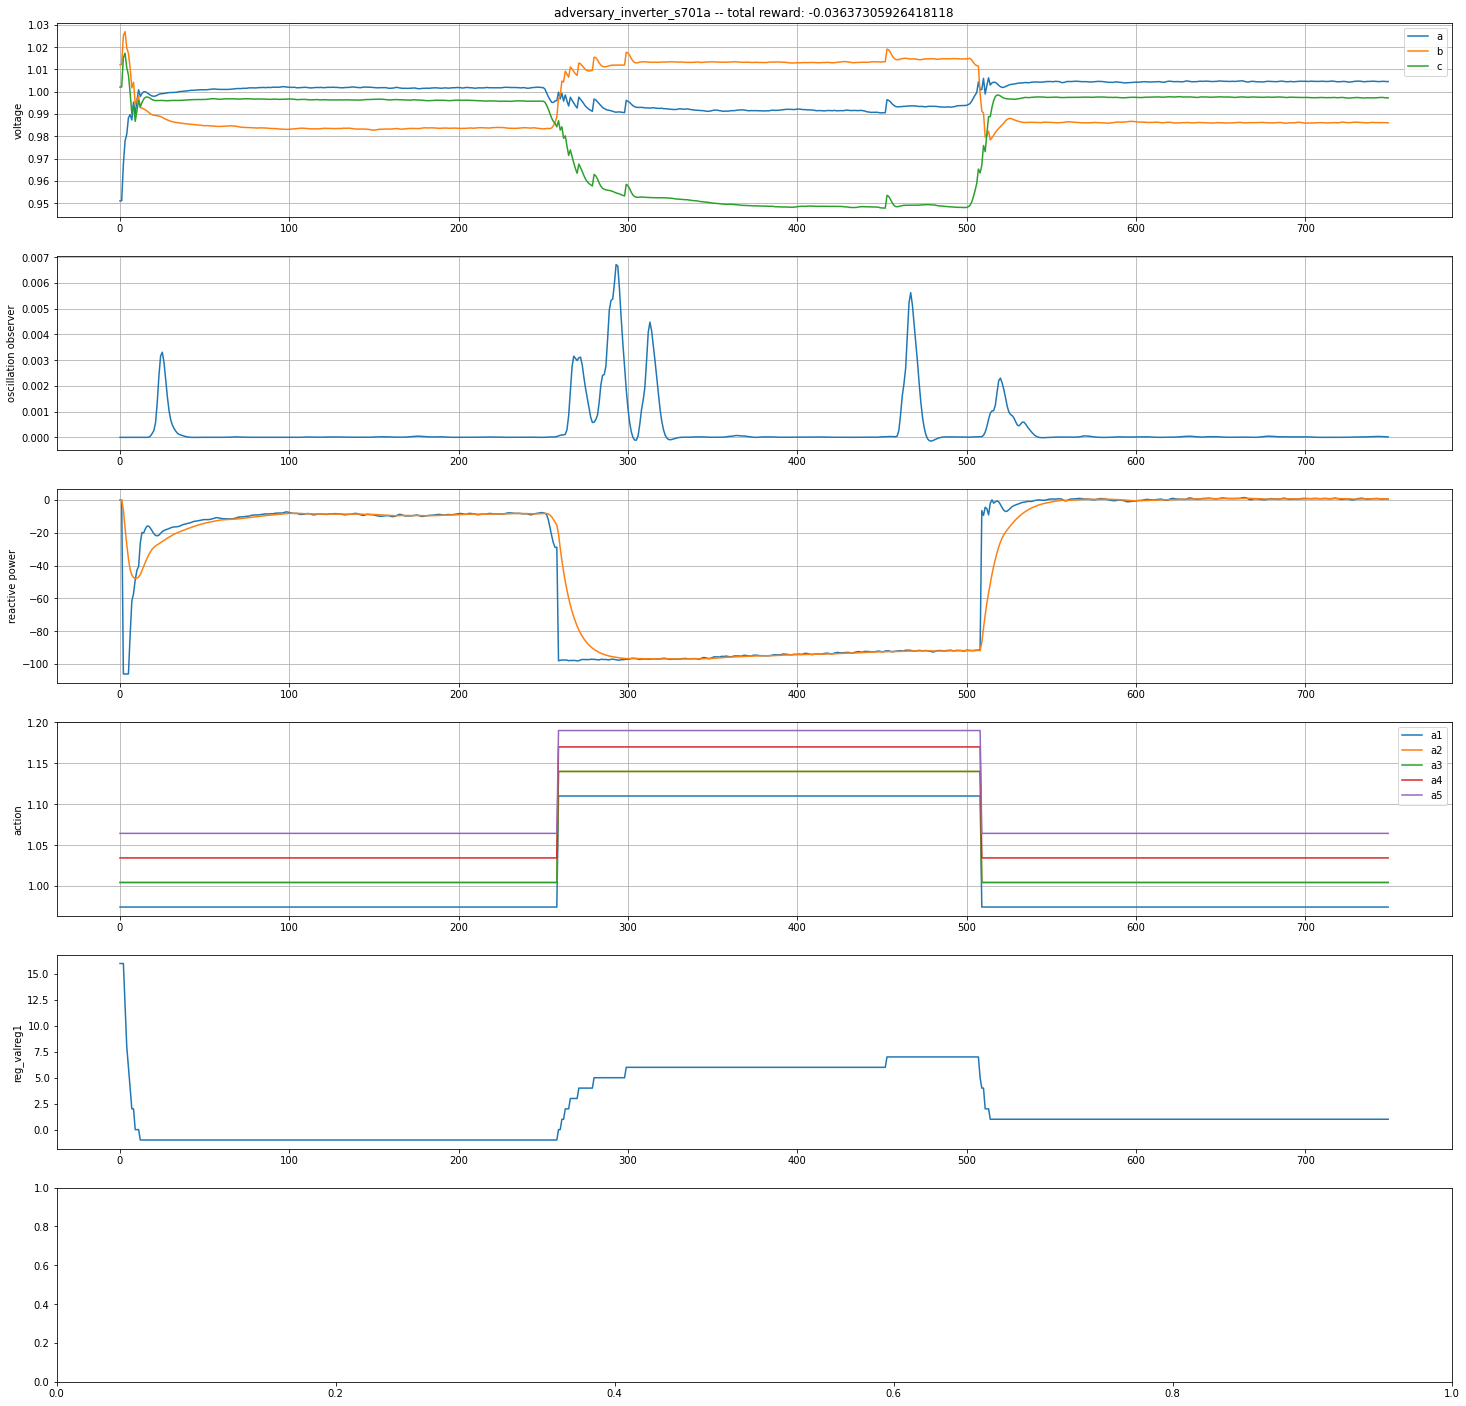

In [4]:
test_env.plot_unbalance(pycigar_params['exp_tag'], env_name, 0, reward)

In [5]:
obs = test_env.reset()
reward = 0
done = False
while not done:
    # for each observation, let the policy decides what to do
    obs, r, done, _ = test_env.step(3)
    reward += r
# plot the result. This will be saved in ./results
#test_env.plot(pycigar_params['exp_tag'], env_name, 0, reward)

[0. 0.]
[0. 0.]
[-85.28940088 -85.28940088]
[-85.18711947 -85.18711947]
[-84.90903996 -84.90903996]
[-67.99271921 -67.99271921]
[-51.96747384 -51.96747384]
[-35.67581051 -35.67581051]
[-17.71039251 -17.71039251]
[-8.98486941 -8.98486941]
[-2.81383852 -2.81383852]
[11.31256007 11.31256007]
[14.05808608 14.05808608]
[9.28533404 9.28533404]
[14.48255321 14.48255321]
[19.88765899 19.88765899]
[23.41753197 23.41753197]
[24.69745098 24.69745098]
[23.91935104 23.91935104]
[21.95296058 21.95296058]
[19.58157575 19.58157575]
[16.98821538 16.98821538]
[14.56717638 14.56717638]
[12.69845127 12.69845127]
[11.28703086 11.28703086]
[10.19216941 10.19216941]
[9.34887404 9.34887404]
[8.69131418 8.69131418]
[8.22930838 8.22930838]
[7.72965247 7.72965247]
[7.11627344 7.11627344]
[6.67166298 6.67166298]
[6.37603689 6.37603689]
[6.07522121 6.07522121]
[12.72281473 12.72281473]
[20.36156567 20.36156567]
[20.19140033 20.19140033]
[17.45165344 17.45165344]
[14.16902918 14.16902918]
[11.57358702 11.57358702]


In [ ]:
env = create_env()
obs_space = env.observation_space  # get the observation space, we need this to construct our agent(s) observation input
act_space = env.action_space  # get the action space, we need this to construct our agent(s) action output
obs = env.reset()
reward = 0
done = False
while not done:
    # for each observation, let the policy decides what to do
    obs, r, done, _ = env.step(3)
    reward += r
# plot the result. This will be saved in ./results
#test_env.plot(pycigar_params['exp_tag'], env_name, 0, reward)

In [ ]:
test_env.get_pycigar_output_specs()

directory = '/Users/toanngo/Documents/GitHub/ceds-cigar/rl/data/ieee37busdata/ieee37.dss'
dss.run_command('Redirect '+ directory)